In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('quanTri.csv')
df

,,Kinh te vi mo,Toan cao cap C1,Marketing can ban,Ky nang giao tiep,Giao duc quoc phong,Ky nang ban hang,Nhap mon nganh quan tri,"Tin hoc MOS 1 (Windows, Word)",Sinh hoat dau khoa,...,Hanh vi to chuc,Quan tri rui ro trong kinh doanh,Quan tri Logistics,Quan tri kinh doanh quoc te,Module 2: Kinh doanh xuat nhap khau,Tam ly hoc dai cuong,"Van tai, bao hiem van tai quoc te",Logistics,Trung binh tich luy,Xep loai
0,Diem tong ket,"7,80","7,30","7,00","9,20","8,00","8,00","8,00","7,70",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,70",Kha
1,Diem tong ket,"6,60","6,50","6,30","9,30","7,00","7,60","7,50","6,80",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,35",Kha
2,Diem tong ket,"8,90","8,20","7,90","9,70","7,00","7,90","8,40","9,30",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,30",Gioi
3,Diem tong ket,"6,30","6,00","6,40","9,30","7,00","6,50","7,00","5,50",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,91",Trung binh
4,Diem tong ket,"8,70","9,20","7,70","9,70","7,00","7,90","7,40","9,30",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",Gioi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Diem tong ket,"4,80","6,60","8,90","5,80","7,00",NaN,"7,50","4,80",NaN,...,"7,40","7,00","9,00","7,80","8,00","6,70","6,90","9,00","6,98",Trung binh
119,Diem tong ket,"9,40","9,20","7,20","5,90","7,00",NaN,"8,30","8,20",NaN,...,"8,00","7,00","6,70","5,70","9,00","8,20","8,50","6,70","7,37",Kha
120,Diem tong ket,"7,60","7,80","7,10","7,30","8,00",NaN,"9,20","9,00",NaN,...,"8,00","6,80","9,00","7,70","8,20","7,70","9,00","8,70","7,69",Kha
121,Diem tong ket,"5,40","5,00","7,40","6,10","5,40",NaN,"7,40","6,00",NaN,...,"6,70","9,40","8,40","9,20","8,00","7,10","9,10","8,20","6,92",Trung binh


In [3]:
for i in df.columns:
    missing_Data=df[i].isna().sum()
    pecent=missing_Data/len(df)*100
    if pecent > 80:
        df=df.drop(i,axis=1)
    print(f"missing data is {pecent}% in colums {i}")

missing data is 0.0% in colums  
missing data is 0.0% in colums Kinh te vi mo
missing data is 0.0% in colums Toan cao cap C1
missing data is 0.0% in colums  Marketing can ban
missing data is 0.0% in colums Ky nang giao tiep
missing data is 0.0% in colums Giao duc quoc phong
missing data is 65.04065040650406% in colums Ky nang ban hang
missing data is 0.0% in colums Nhap mon nganh quan tri
missing data is 0.0% in colums  Tin hoc MOS 1 (Windows, Word)
missing data is 100.0% in colums Sinh hoat dau khoa
missing data is 0.0% in colums Quan tri hoc
missing data is 0.0% in colums  Tin hoc MOS 2 (Excel, Powerpoint)
missing data is 0.0% in colums Tieng Anh tong quat 1
missing data is 0.0% in colums Khoi nghiep
missing data is 65.04065040650406% in colums Toan kinh te
missing data is 65.04065040650406% in colums Tam li hoc khach hang
missing data is 65.04065040650406% in colums Tu duy phan bien
missing data is 0.0% in colums Kinh te vi mo.1
missing data is 0.0% in colums Phap luat dai cuong
mis

In [4]:
df['Xep loai'].value_counts()

Kha           82
Trung binh    36
Gioi           5
Name: Xep loai, dtype: int64

<AxesSubplot:>

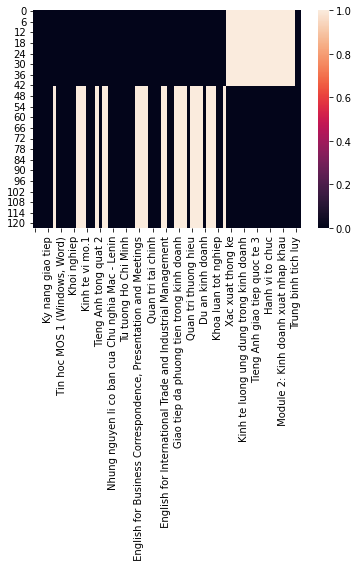

In [5]:
sns.heatmap(df.isna())

In [6]:
df=df.drop(['Giao duc quoc phong','Giao duc the chat'],axis=1)

In [7]:
count_class0,count_class1,count_class2=df['Xep loai'].value_counts()
df_class0=df[df['Xep loai']=='Kha']
df_class1=df[df['Xep loai']=='Trung binh']
df_class2=df[df['Xep loai']=='Gioi']

df_class1_over=df_class1.sample(len(df_class0),replace=True)
df_class2_over=df_class2.sample(len(df_class0),replace=True)

df1=pd.concat([df_class0,df_class1_over,df_class2_over],axis=0)
df1=df1.iloc[:,1:]
df1=df

In [8]:
df1['Xep loai'].value_counts()

Kha           82
Trung binh    36
Gioi           5
Name: Xep loai, dtype: int64

In [9]:
df_train=df1.iloc[:,1:-2]
result=df1.iloc[:,-1]

In [10]:
for col in df_train:
    df_train[col]=df_train[col].apply(lambda x:float(str(x).replace(',','.')))
for col in df_train:
    df_train[col]=df_train[col].fillna(df_train[col].mean())

C:\Users\HoaiFong\AppData\Local\Temp/ipykernel_11028/167655690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col]=df_train[col].apply(lambda x:float(str(x).replace(',','.')))
C:\Users\HoaiFong\AppData\Local\Temp/ipykernel_11028/167655690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col]=df_train[col].fillna(df_train[col].mean())


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

In [12]:
X_train1,X_test1,y_train1,y_test1=train_test_split(df_train,result,test_size=0.2,random_state=0)
rf = RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                class_weight="balanced",
                                max_features="auto")
rf.fit(X_train1,y_train1)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred0=rf.predict(X_test1)
print(classification_report(y_test1,y_pred0))
print(accuracy_score(y_test1, y_pred0))

              precision    recall  f1-score   support

        Gioi       0.00      0.00      0.00         1
         Kha       0.91      1.00      0.95        20
  Trung binh       1.00      0.75      0.86         4

    accuracy                           0.92        25
   macro avg       0.64      0.58      0.60        25
weighted avg       0.89      0.92      0.90        25

0.92


D:\ToolCode\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ToolCode\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ToolCode\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
sorted_idx = rf.feature_importances_.argsort()
arr=[]
for i in zip(X_train1.columns[sorted_idx], rf.feature_importances_[sorted_idx]):
    arr.append(i)
sorted_by_second = sorted(arr, key=lambda tup: tup[1], reverse=True)

In [14]:
a=sorted_by_second[:len(sorted_by_second)//2]
names=[]
for i in range(len(a)):
    names.append(a[i][0])
names  

[' Tin hoc MOS 1 (Windows, Word)',
 ' Tin hoc MOS 2 (Excel, Powerpoint)',
 'Toan cao cap C1',
 'Kinh te quoc te',
 'Ky nang giao tiep',
 'Du an kinh doanh',
 'Kinh te vi mo',
 'Nguyen ly ke toan',
 'Khoi nghiep',
 'Qui hoach tuyen tinh',
 'Quan tri tai chinh',
 'Tieng Anh giao tiep quoc te 2',
 'Thong ke kinh doanh.1',
 'Quan tri nguon nhan luc',
 'Quan tri Logistics',
 'Duong loi cach mang cua Dang cong san Viet Nam',
 'Tieng Anh tong quat 2',
 'Toan kinh te',
 'Nhap mon nganh quan tri',
 'Xac xuat thong ke',
 'Nhung nguyen li co ban cua Chu nghia Mac - Lenin',
 'Khoa luan tot nghiep',
 'Cham soc khach hang',
 'Thuong mai dien tu',
 'Luat kinh doanh',
 'Hanh vi to chuc',
 'Tam ly hoc dai cuong',
 'Quan tri hoc',
 'Tieng Anh giao tiep quoc te 1',
 'Kinh te vi mo.1',
 'Tieng Anh tong quat 1',
 ' Marketing can ban',
 'Tieng Anh giao tiep quoc te 2.1',
 'Quan tri san xuat va chat luong',
 'Van tai, bao hiem van tai quoc te',
 'Tieng Anh chuyen nganh 2',
 'Tu tuong Ho Chi Minh',
 'Kinh te 

In [15]:
df2=df1[names]
for col in df2:
    df2[col]=df2[col].apply(lambda x:float(str(x).replace(',','.')))
for col in df2:
    df2[col]=df2[col].fillna(df2[col].mean())
df2

X_train2,X_test2,y_train2,y_test2=train_test_split(df2,result,test_size=0.2,random_state=0)

rdf = RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                class_weight="balanced",
                                max_features="auto")
rdf.fit(X_train2,y_train2)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred1=rdf.predict(X_test2)
print(classification_report(y_test2,y_pred1))
print(accuracy_score(y_test2, y_pred1))

C:\Users\HoaiFong\AppData\Local\Temp/ipykernel_11028/2241887507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]=df2[col].apply(lambda x:float(str(x).replace(',','.')))
C:\Users\HoaiFong\AppData\Local\Temp/ipykernel_11028/2241887507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]=df2[col].fillna(df2[col].mean())


              precision    recall  f1-score   support

        Gioi       1.00      1.00      1.00         1
         Kha       0.95      1.00      0.98        20
  Trung binh       1.00      0.75      0.86         4

    accuracy                           0.96        25
   macro avg       0.98      0.92      0.94        25
weighted avg       0.96      0.96      0.96        25

0.96


In [16]:
df_temp=df[names]
for col in df_temp:
    df_temp[col]=df_temp[col].apply(lambda x:float(str(x).replace(',','.')))
for col in df2:
    df_temp[col]=df_temp[col].fillna(df_temp[col].mean())
df_temp
df3=pd.concat([df_temp,df.iloc[:,-1]],axis=1)

C:\Users\HoaiFong\AppData\Local\Temp/ipykernel_11028/2046318792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[col]=df_temp[col].apply(lambda x:float(str(x).replace(',','.')))
C:\Users\HoaiFong\AppData\Local\Temp/ipykernel_11028/2046318792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[col]=df_temp[col].fillna(df_temp[col].mean())


In [17]:
df3['Xep loai'].value_counts()

Kha           82
Trung binh    36
Gioi           5
Name: Xep loai, dtype: int64

In [18]:
soluong = len(df3)
soluong
mang_chua_27_tong_diem = []
for i in range(len(names)):
    tong_mon = 0.0
    
    for j in range(soluong):
        tong_mon += df3.iloc[j,i]
        
    mang_chua_27_tong_diem.append(tong_mon/soluong)
tenMon=df3.columns
len(mang_chua_27_tong_diem)


38

In [19]:
a=np.array(mang_chua_27_tong_diem)
a.sum()/(len(sorted_by_second)//2)

7.169124461394555

In [20]:
min_27 = min(mang_chua_27_tong_diem)
max_27 = max(mang_chua_27_tong_diem)
hieu = max_27 - min_27


moc_tb = np.linspace(min_27,max_27, 7)
arr_tb =[]
for i in range(len(moc_tb)):
    arr_tb.append(moc_tb[i])


arr_dtbk = []
for j in range(1,len(arr_tb)):
    
    dtbk = (arr_tb[j-1]+ arr_tb[j])/2
    arr_dtbk.append(dtbk)

In [21]:
chia_deu_5_muc_kho = hieu/5

In [22]:
kho_5 = min_27 + 1*chia_deu_5_muc_kho
kho_4 = min_27 + 2*chia_deu_5_muc_kho
kho_3 = min_27 + 3*chia_deu_5_muc_kho
kho_2 = min_27 + 4*chia_deu_5_muc_kho
kho_1 = min_27 + 5*chia_deu_5_muc_kho

In [23]:
def do_kho(diem):
    if (diem>4 and diem<=4.5):
        return 4 
    elif (diem>4.5 and diem<=5.5):
        return 5
    elif (diem>5.5 and diem<=6.5):
        return 6
    elif (diem>6.5 and diem<=7.5):
        return 7
    elif (diem>7.5 and diem<=8.5):
        return 8
    elif (diem>8.5 and diem<=9.5):
        return 9
    else:
        return 10

In [24]:
mang_do_kho_mon = {}

for i in range(len(mang_chua_27_tong_diem)):
    x = mang_chua_27_tong_diem[i]
    s = do_kho(x)
    mang_do_kho_mon[tenMon[i]]=s
mang_do_kho_mon

{' Tin hoc MOS 1 (Windows, Word)': 7,
 ' Tin hoc MOS 2 (Excel, Powerpoint)': 7,
 'Toan cao cap C1': 7,
 'Kinh te quoc te': 7,
 'Ky nang giao tiep': 7,
 'Du an kinh doanh': 8,
 'Kinh te vi mo': 7,
 'Nguyen ly ke toan': 7,
 'Khoi nghiep': 7,
 'Qui hoach tuyen tinh': 7,
 'Quan tri tai chinh': 8,
 'Tieng Anh giao tiep quoc te 2': 7,
 'Thong ke kinh doanh.1': 7,
 'Quan tri nguon nhan luc': 7,
 'Quan tri Logistics': 7,
 'Duong loi cach mang cua Dang cong san Viet Nam': 7,
 'Tieng Anh tong quat 2': 7,
 'Toan kinh te': 8,
 'Nhap mon nganh quan tri': 7,
 'Xac xuat thong ke': 7,
 'Nhung nguyen li co ban cua Chu nghia Mac - Lenin': 6,
 'Khoa luan tot nghiep': 8,
 'Cham soc khach hang': 7,
 'Thuong mai dien tu': 7,
 'Luat kinh doanh': 8,
 'Hanh vi to chuc': 8,
 'Tam ly hoc dai cuong': 8,
 'Quan tri hoc': 7,
 'Tieng Anh giao tiep quoc te 1': 7,
 'Kinh te vi mo.1': 7,
 'Tieng Anh tong quat 1': 7,
 ' Marketing can ban': 7,
 'Tieng Anh giao tiep quoc te 2.1': 7,
 'Quan tri san xuat va chat luong': 7,


In [25]:
def diem_tt(tenMon, diem):

    return diem*mang_do_kho_mon[tenMon],mang_do_kho_mon[tenMon]

In [26]:
arr_something=[]
for i in range(0,soluong):
    arr_input = df_train.iloc[i,1:-1].values
    arr_diemtt = []
    arr_diemtanggiam = []
    arr_input = list(map(lambda x:float(str(x).replace(',','.')), arr_input))

    arr_tenmon = df_train.columns
    arr_tenmon = arr_tenmon[1:-1]

    b={}
    for i in range(0,len(arr_input)):
        b[arr_tenmon[i]]=arr_input[i]
    arr_something.append(b)


In [27]:
def persent(diem_quakhu, diem_hientai):
    return ((diem_hientai-diem_quakhu)/(diem_hientai+diem_quakhu))*100

In [28]:
def tinh_diem(diem_quakhu, diem_hientai):
    return (diem_hientai+diem_quakhu)/2

In [29]:
arr_Check_Diem=[]
def thuc_hoc(inputt):
    for i in inputt:
        diemt=0
        doKho=0
        for j in i:
            if j in mang_do_kho_mon:
                point,dok=diem_tt(j,i.get(j))
                diemt+=point
                doKho+=dok
        arr_Check_Diem.append(diemt/doKho)
    return arr_Check_Diem

In [30]:
arr_diem_nl=thuc_hoc(arr_something)

In [31]:
df_dl=pd.DataFrame(np.stack((arr_diem_nl,df['Xep loai'])))

In [32]:
df_dl=df_dl.T

<AxesSubplot:>

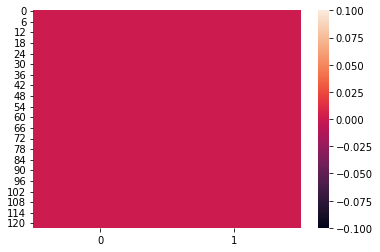

In [33]:
sns.heatmap(df_dl.isna())

In [34]:
from sklearn.datasets import make_multilabel_classification
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
result=le.fit_transform(df_dl[1])
result=np.array(result.astype('float'))
train=df_dl[0]
train=np.array(train.astype('float'))

from sklearn.model_selection import train_test_split

X_train3,X_test3,y_train3,y_test3=train_test_split(train,result,test_size=0.2,random_state=0)

clf1 = RandomForestClassifier(n_estimators=500, 
                                max_depth=10,  
                                class_weight="balanced",
                                max_features="auto")

clf1.fit(X_train3.reshape(-1, 1), y_train3)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred2 = clf1.predict(X_test3.reshape(-1, 1))
print(classification_report(y_test3,pred2))
print(accuracy_score(y_test3, pred2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       0.95      1.00      0.98        20
         2.0       1.00      0.75      0.86         4

    accuracy                           0.96        25
   macro avg       0.98      0.92      0.94        25
weighted avg       0.96      0.96      0.96        25

0.96


In [35]:
df_test=pd.read_csv('test.csv')
df_test

,,Kinh te quoc te,Toan cao cap C1,Sinh hoat dau khoa,Quan tri hoc,Ky nang thuyet trinh,Nhap mon nganh quan tri,Marketing can ban,Ky nang giao tiep,Giao duc quoc phong,...,Tu tuong Ho Chi Minh,Qui hoach tuyen tinh,Nguyen ly ke toan,Chuyen de tot nghiep,To chuc su kien,Thanh toan quoc te,Quan tri thuong hieu,Quan tri rui ro trong kinh doanh,Trung binh tich luy,Xep loai
0,Diem tong ket,"6,10","5,70",NaN,"6,40","7,80","7,90","6,20","9,50","7,00",...,"9,10","8,10","6,50","7,50","7,80","9,40","8,20","8,00","7,01",Kha
1,Diem tong ket,"6,60","6,90",NaN,"5,90","8,90","7,30","7,00","5,20","7,20",...,"8,10","7,70","7,00","8,80","8,00","8,00","9,00","8,80","7,22",Kha
2,Diem tong ket,"8,20","7,40",NaN,"8,30","10,00","8,00","7,70","6,90","8,00",...,"7,60","8,00","7,50","8,00","7,40","7,50","7,50","9,00","7,79",Kha
3,Diem tong ket,"7,90","5,70",NaN,"5,40","7,10","5,80","7,00","6,00","6,00",...,"8,30","7,00","6,30","7,50","6,20","7,00","8,50","7,60","6,59",Trung binh
4,Diem tong ket,"8,00","6,40",NaN,"9,10","5,90","6,90","4,80","6,00","5,60",...,"8,30","5,80","7,50","8,20","6,50","8,10","8,90","7,30","6,74",Trung binh
5,Diem tong ket,"8,70","6,70",NaN,"10,00","7,00","5,60","6,80","6,00","4,80",...,"8,50","8,20","6,80","6,70","5,60","8,50","8,80","9,10","6,93",Trung binh
6,Diem tong ket,"9,20","8,60",NaN,"7,60","9,50","7,90","7,70","5,80","7,00",...,"8,50","6,70","9,50","8,00","8,00","7,90","7,00","7,70","7,39",Kha
7,Diem tong ket,"6,60","8,50",NaN,"7,10","9,90","7,40","7,20","5,90","7,00",...,"8,00","7,30","6,00","7,40","8,50","8,00","8,80","6,80","7,34",Kha
8,Diem tong ket,"6,60","8,50",NaN,"7,10","9,90","7,40","7,20","5,90","7,00",...,"8,00","7,30","6,00","7,40","8,50","8,00","8,80","6,80","6,83",Trung binh


In [36]:
for i in df_test.columns:
    missing_Data=df_test[i].isna().sum()
    pecent=missing_Data/len(df_test)*100
    if pecent > 80:
        df_test=df_test.drop(i,axis=1)

In [37]:
df_test=df_test.drop(['Giao duc quoc phong','Giao duc the chat'],axis=1)

In [38]:
a=df.iloc[8,1:9]

In [39]:
arr_tenmon = df_test.columns
arr_tenmon = arr_tenmon[1:-1]

a=a.apply(lambda x:float(str(x).replace(',','.')))
a=a.astype('float')
print(a)

Kinh te vi mo                     6.5
Toan cao cap C1                   7.0
 Marketing can ban                5.6
Ky nang giao tiep                 9.7
Ky nang ban hang                  5.4
Nhap mon nganh quan tri           6.5
 Tin hoc MOS 1 (Windows, Word)    6.3
Quan tri hoc                      4.7
Name: 8, dtype: float64


In [40]:
b={}
arr_input_test =[]
for i in range(0,len(a)):
    b[arr_tenmon[i]]=a[i]
arr_input_test.append(b)

arr_Check_Diem=[]

def thuc_hoct(inputt):
    diemt=0.0
    doKho=0.0
    for j in inputt:
        print(j)
        if j in mang_do_kho_mon:
            point,dok=diem_tt(j,i.get(j))
            diemt+=point
            doKho+=dok
    arr_Check_Diem.append(diemt/doKho)
    print('điểm và độ khó: ',diemt/doKho)
    return arr_Check_Diem

arr_diem=np.array(thuc_hoc(arr_input_test))
print(clf1.predict(arr_diem.reshape(-1,1)))

[2.]
